In [51]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

In [52]:
# Setting up R dependencies
import anndata2ri
import rpy2
from rpy2.robjects import r
import random

anndata2ri.activate()

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [53]:
%%R
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(tidyr)
    library(dplyr)
    library(purrr)
    library(tibble)
})

In [54]:
%%R
library("nichenetr", lib="/home/d/danilina/mambaforge/envs/scanpy_r/lib/R/library")

In [55]:
# figure settings
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200, facecolor="white")
sc.set_figure_params(figsize=(5, 5))

In [56]:
adata = sc.read("../../../data/schiller_whl_anno.h5ad")
adata

AnnData object with n_obs × n_vars = 24071 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet', 'leiden_0.7', 'leiden', 'leiden_1.3', 'author_annotation', 'batch', 'condition', 'timepoint', 'leiden_0.5', 'manual_celltype_annotation', 'author_annotation_coarse'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell.type_colors', 'grouping_col

/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


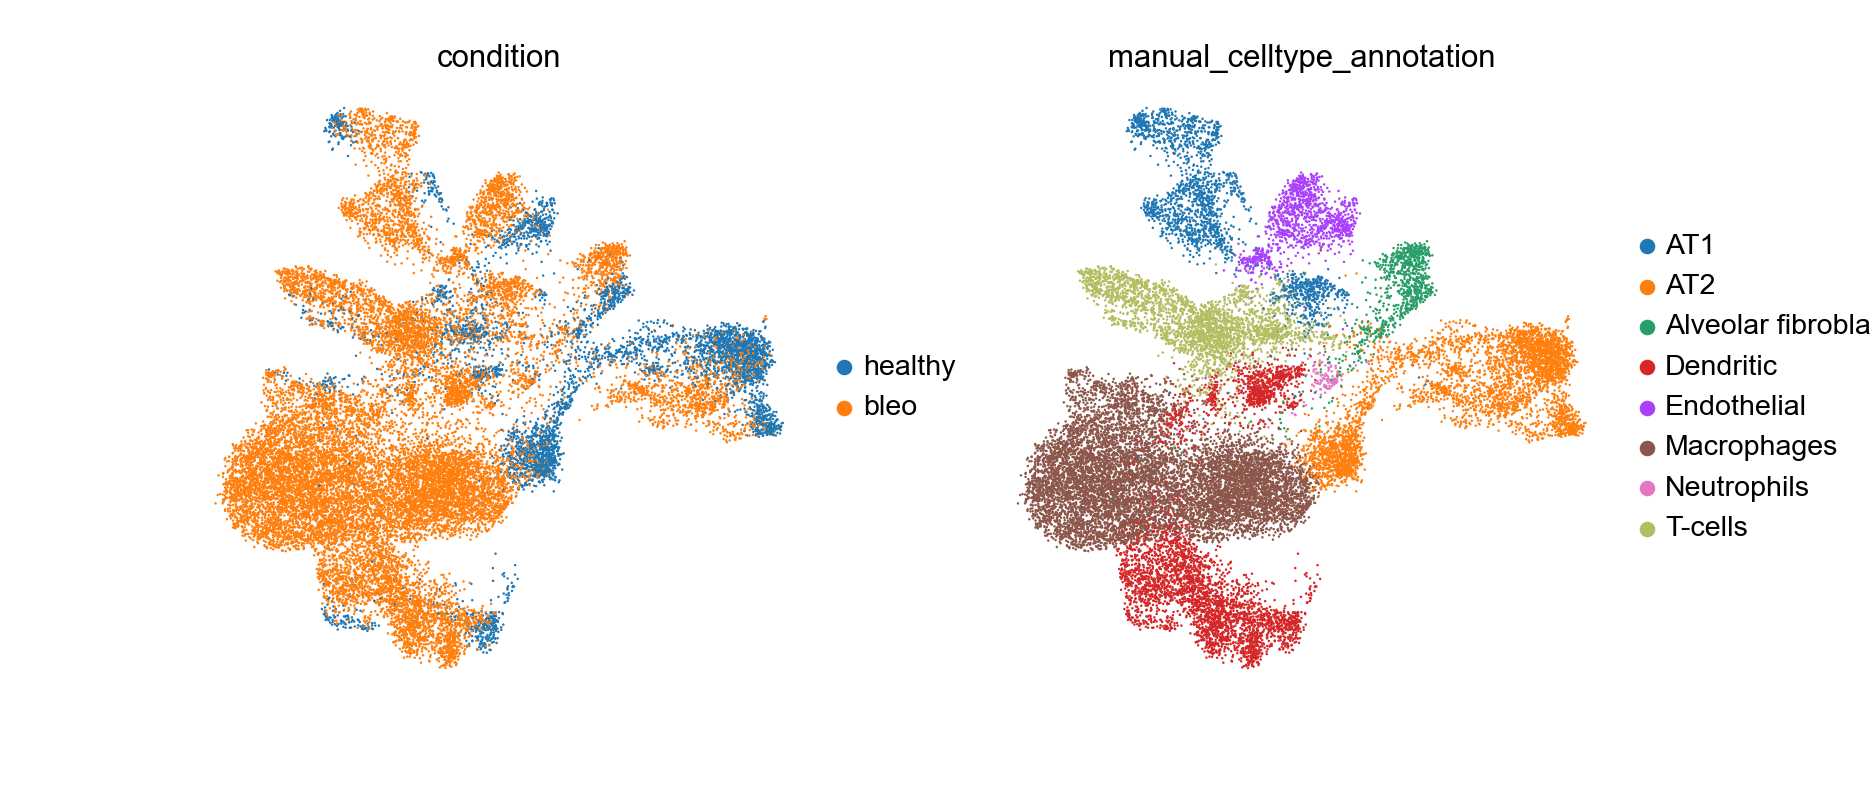

In [57]:
sc.pl.umap(adata, color=["condition", "manual_celltype_annotation"], frameon=False)

In [58]:
adata.obs[(adata.obs["condition"]=="healthy") & (adata.obs["manual_celltype_annotation"]=="Neutrophils")]

,Unnamed: 0,nGene,nUMI,orig.ident,identifier,res.2,grouping,cell.type,metacelltype,spline_cluster,...,leiden_0.7,leiden,leiden_1.3,author_annotation,batch,condition,timepoint,leiden_0.5,manual_celltype_annotation,author_annotation_coarse
312,muc4169_PBS_d14:muc4169_PBS_d14:CATGTCCAGAAA,276,357,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
441,muc4169_PBS_d14:muc4169_PBS_d14:TGTCCTAACCGT,326,667,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
754,muc4169_PBS_d14:muc4169_PBS_d14:TTGAGACACGTC,231,309,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
826,muc4169_PBS_d14:muc4169_PBS_d14:CACGTTAGCTCC,239,327,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
832,muc4169_PBS_d14:muc4169_PBS_d14:ATTAACCACAGC,346,522,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
1096,muc4169_PBS_d14:muc4169_PBS_d14:TTCGGTGTTATT,219,296,muc4169,muc4169_PBS_d14,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4169,healthy,d14,11,Neutrophils,granulocytes
1479,muc4170_PBS_d21:muc4170_PBS_d21:ACCGGGACCCCG,335,588,muc4170,muc4170_PBS_d21,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4170,healthy,d21,11,Neutrophils,granulocytes
1871,muc4170_PBS_d21:muc4170_PBS_d21:CTTGCCTCCGCC,319,524,muc4170,muc4170_PBS_d21,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4170,healthy,d21,11,Neutrophils,granulocytes
1883,muc4170_PBS_d21:muc4170_PBS_d21:ATCCCATCGCAC,277,545,muc4170,muc4170_PBS_d21,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4170,healthy,d21,11,Neutrophils,granulocytes
2107,muc4170_PBS_d21:muc4170_PBS_d21:TAAGCCCACTCC,205,327,muc4170,muc4170_PBS_d21,20,PBS,Neutrophils,granulocytes,granulocytes,...,15,18,20,Neutrophils,muc4170,healthy,d21,11,Neutrophils,granulocytes


liana healthy (pbs=saline)

In [59]:
adata_pbs = adata[adata.obs["condition"]=="healthy"].copy()
adata_pbs

AnnData object with n_obs × n_vars = 5030 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet', 'leiden_0.7', 'leiden', 'leiden_1.3', 'author_annotation', 'batch', 'condition', 'timepoint', 'leiden_0.5', 'manual_celltype_annotation', 'author_annotation_coarse'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell.type_colors', 'grouping_colo

In [60]:
adata_pbs.obs["manual_celltype_annotation"]

0                    T-cells
1                        AT2
2                Endothelial
3                        AT2
4                    T-cells
                ...         
29291    Alveolar fibroblast
29292                    AT2
29293    Alveolar fibroblast
29294                    AT2
29295                T-cells
Name: manual_celltype_annotation, Length: 5030, dtype: category
Categories (8, object): ['AT1', 'AT2', 'Alveolar fibroblast', 'Dendritic', 'Endothelial', 'Macrophages', 'Neutrophils', 'T-cells']

In [61]:
from liana.method import rank_aggregate

In [62]:
rank_aggregate(
    adata_pbs, groupby="manual_celltype_annotation", resource_name = 'mouseconsensus', return_all_lrs=True, use_raw=False, verbose=True
)

Using `.X`!
5522 features of mat are empty, they will be removed.


/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/pandas/core/indexing.py:1761: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


0.23 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 5030 samples and 17878 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:04<00:00, 224.66it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [01:09<00:00, 14.47it/s]


In [63]:
adata_pbs.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).sort_values(["magnitude_rank", "specificity_rank"],).head(20)

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
702,Neutrophils,Endothelial,S100a8,Cd36,1.800780,0.0,2.019036,5.736472,2.702123,0.395055,0.989416,0.118976,0.0,2.323512e-12,2.513638e-14
703,Neutrophils,Endothelial,S100a9,Cd36,1.634114,0.0,1.787524,5.835330,2.463146,0.399870,0.988759,0.114324,0.0,2.323512e-12,2.010893e-13
367,Neutrophils,AT2,S100a8,Ager,1.568480,0.0,0.668438,5.367757,2.453358,0.348866,0.981748,0.023753,0.0,2.323512e-12,1.832314e-11
368,Neutrophils,AT2,S100a9,Ager,1.401814,0.0,0.591792,5.466615,2.214381,0.353118,0.980624,0.022728,0.0,2.323512e-12,1.970692e-10
535,Endothelial,Dendritic,App,Cd74,1.282807,0.0,0.928046,1.208141,1.466861,0.120914,0.984466,0.035349,0.0,5.262089e-12,1.056030e-09
694,Macrophages,Endothelial,Pf4,Thbd,0.584092,0.0,0.340525,2.557750,1.103881,0.603615,0.974613,0.016833,0.0,2.323512e-12,6.762378e-09
609,AT1,Endothelial,Col1a2,Cd36,0.577579,0.0,0.319918,1.607019,0.904845,0.392996,0.973829,0.011076,0.0,5.262089e-12,7.079253e-09
615,AT1,Endothelial,C3,Nrp1,0.546903,0.0,0.222641,1.597734,0.964019,0.325684,0.968791,0.007519,0.0,5.262089e-12,8.088939e-09
32,AT1,AT1,C3,Cd81,0.537331,0.0,0.206879,1.645363,0.934985,0.269138,0.967662,0.007731,0.0,5.262089e-12,8.445681e-09
33,AT1,AT1,Gpc3,Cd81,0.519251,0.0,0.197794,1.825435,0.934305,0.307763,0.966952,0.007341,0.0,5.262089e-12,8.812758e-09


consensus dotplot

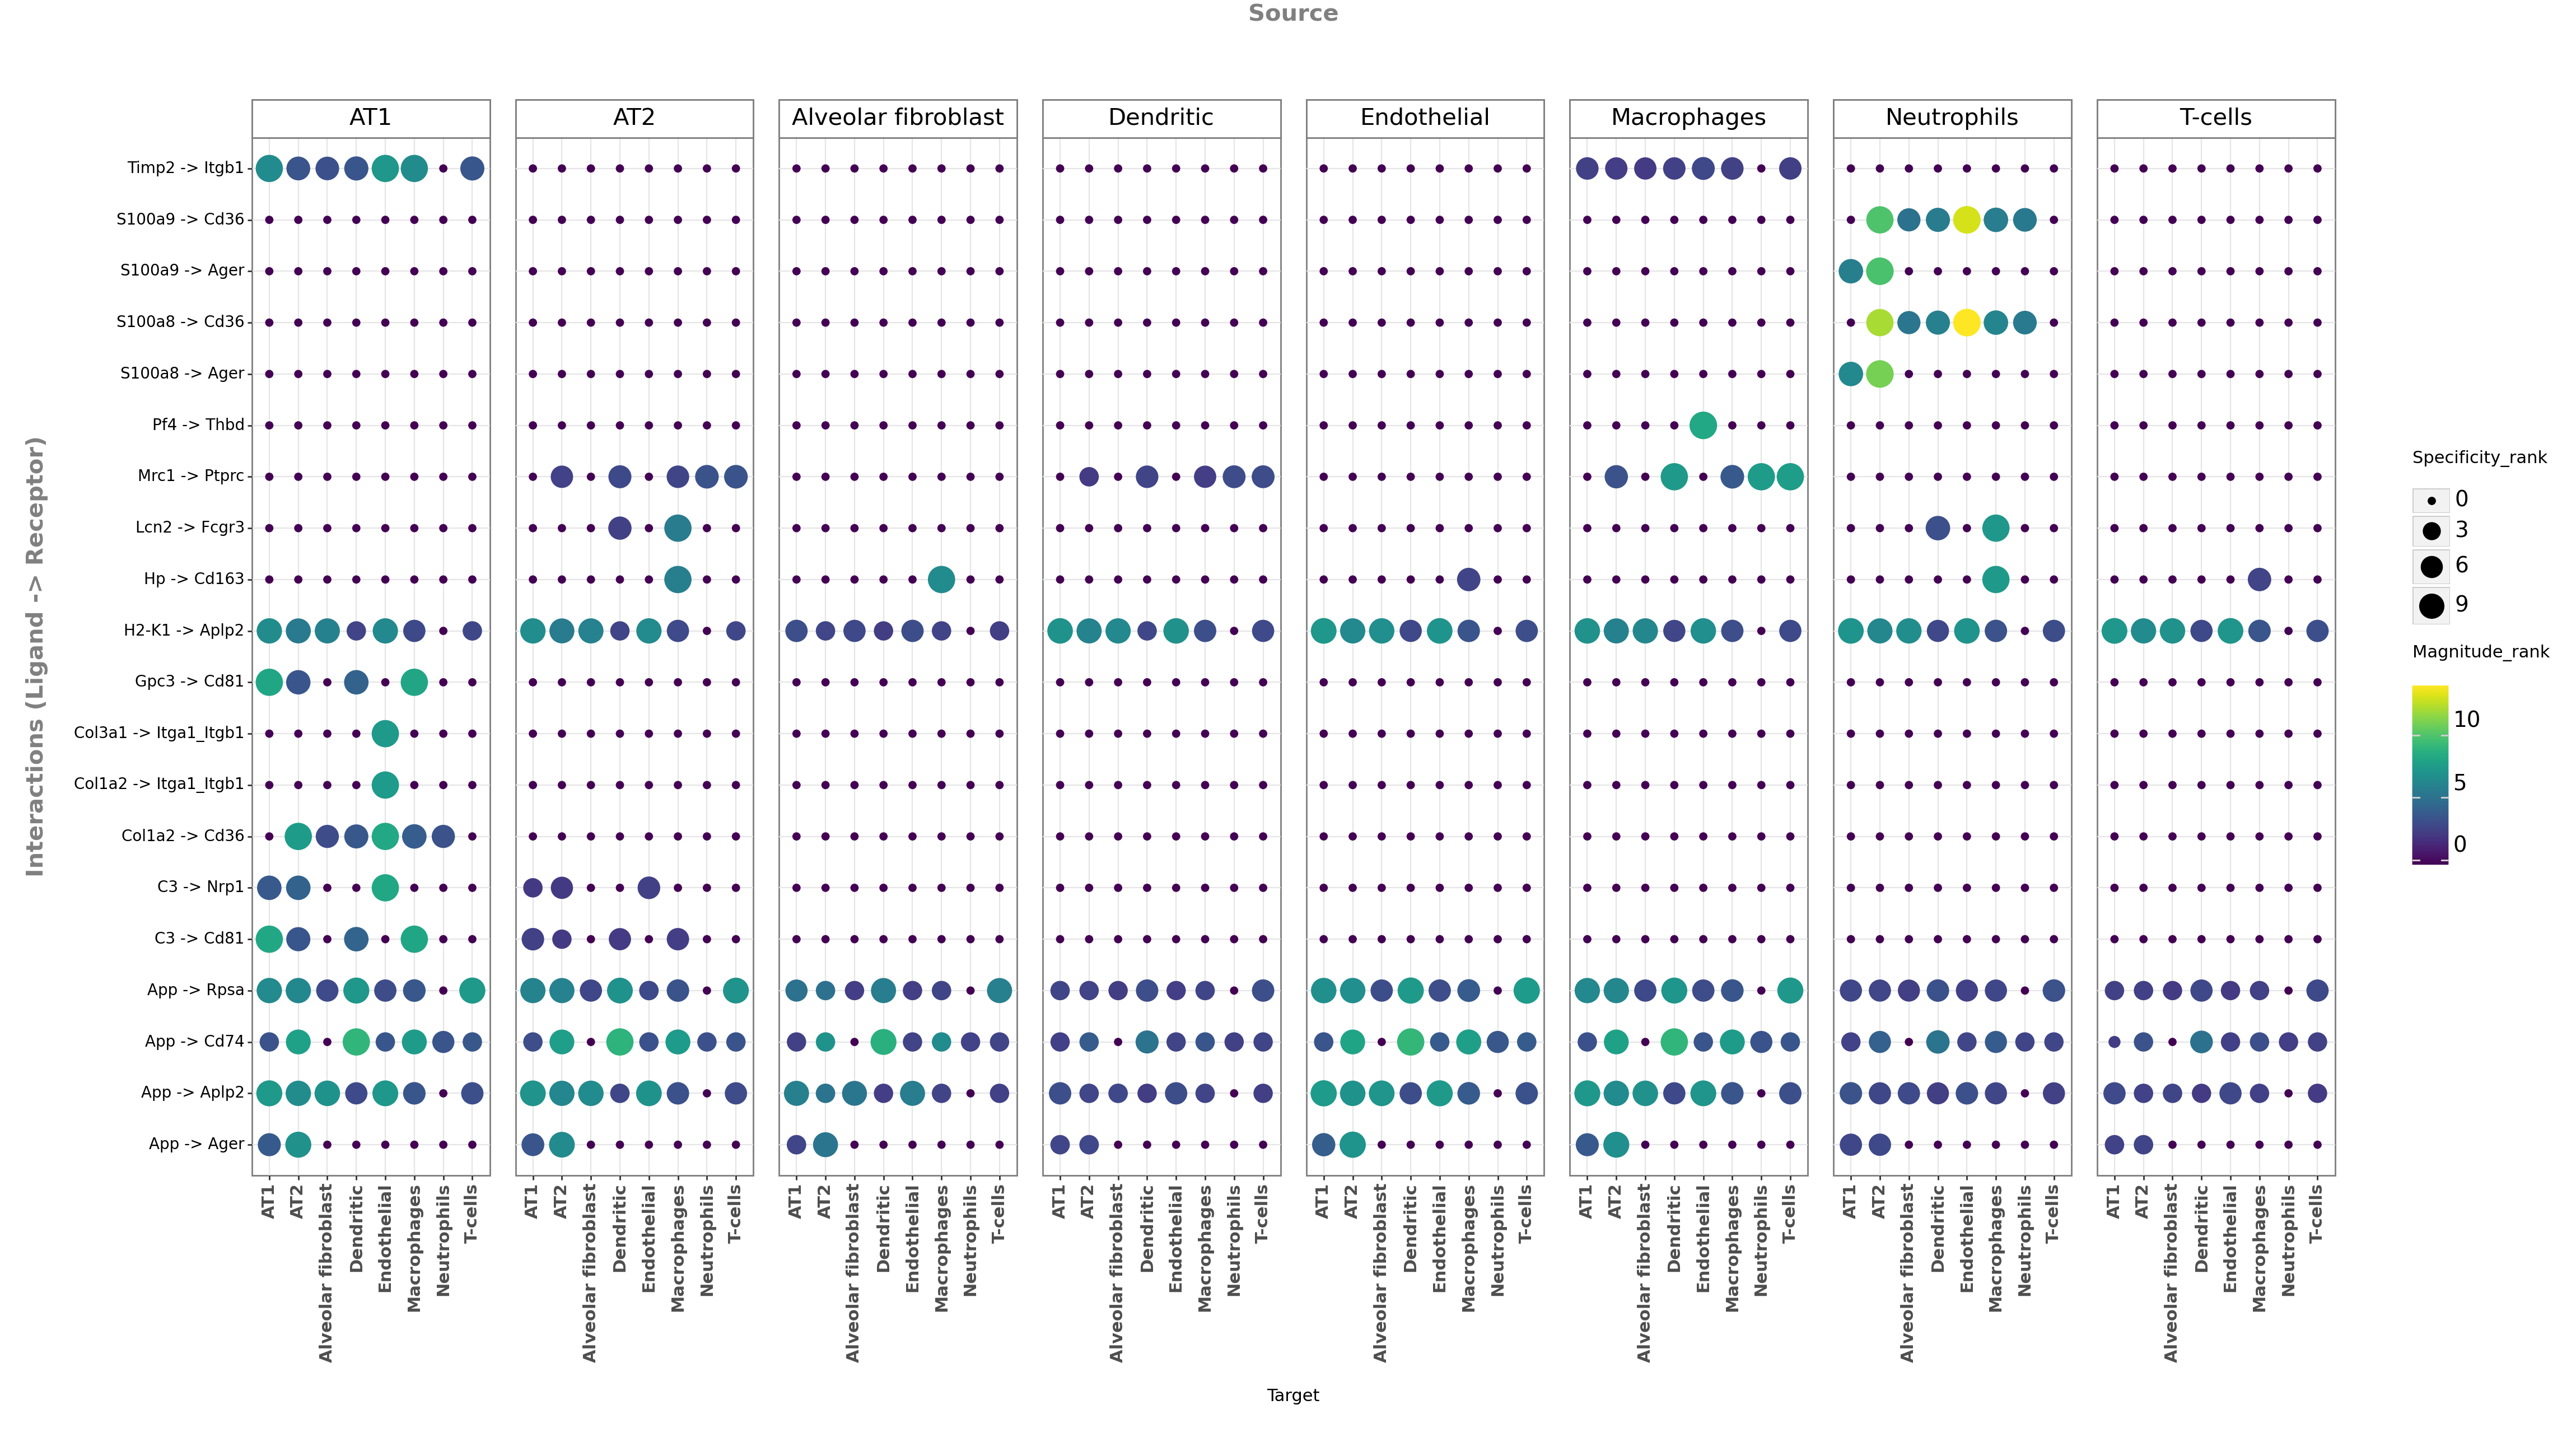

<Figure Size: (2300 x 1300)>

In [64]:
li.pl.dotplot(
    adata=adata_pbs,
    colour="magnitude_rank",
    size="specificity_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    #source_labels=["Neutrophils", "Endothelial", "T-cells", "AT1", "Macrophages"],
    #target_labels=["Endothelial", "AT2", "AT1","Macrophages", "T-cells"],
    # since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    filterby="specificity_rank",
    filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(23, 13),
    #size_range=(1, 6),
)

nichenet

In [65]:
%%R
# Increase timeout threshold
options(timeout=600)

# Load PK
ligand_target_matrix <- readRDS(url("https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final_mouse.rds"))
lr_network <- readRDS(url("https://zenodo.org/record/7074291/files/lr_network_mouse_21122021.rds"))

In [66]:
sender_celltypes = list(adata.obs["manual_celltype_annotation"].cat.categories)
receiver_celltypes = list(adata.obs["manual_celltype_annotation"].cat.categories)

In [67]:
# Helper function to obtain sufficiently expressed genes
from functools import reduce


def get_expressed_genes(adata, cell_type, expr_prop):
    # calculate proportions
    temp = adata[adata.obs["manual_celltype_annotation"] == cell_type, :]
    a = temp.X.getnnz(axis=0) / temp.X.shape[0]
    stats = (
        pd.DataFrame({"genes": temp.var_names, "props": a})
        .assign(cell_type=cell_type)
        .sort_values("genes")
    )

    # obtain expressed genes
    stats = stats[stats["props"] >= expr_prop]
    expressed_genes = stats["genes"].values

    return expressed_genes

In [68]:
sender_expressed = reduce(
    np.union1d,
    [
        get_expressed_genes(adata, cell_type=cell_type, expr_prop=0.1)
        for cell_type in sender_celltypes
    ],
)
receiver_expressed = reduce(
    np.union1d,
    [
        get_expressed_genes(adata, cell_type=cell_type, expr_prop=0.1)
        for cell_type in receiver_celltypes
    ],
)

In [69]:
%%R -i sender_expressed -i receiver_expressed
# get ligands and receptors in the resource
ligands <- lr_network %>% pull(from) %>% unique()
receptors <- lr_network %>% pull(to) %>% unique()

# only keep the intersect between the resource and the data
expressed_ligands <- intersect(ligands, sender_expressed)
expressed_receptors <- intersect(receptors, receiver_expressed)

# filter the network to only include ligands for which both the ligand and receptor are expressed
potential_ligands <- lr_network %>% 
  filter(from %in% expressed_ligands & to %in% expressed_receptors) %>%
  pull(from) %>% unique()

In [70]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col="batch",
    groups_col="manual_celltype_annotation",
    min_prop=0.1,
    min_smpls=3,
    layer="raw_counts",
)

In [71]:
# Storing the raw counts
pdata.layers["counts"] = pdata.X.copy()

# Does PC1 captures a meaningful biological or technical fact?
pdata.obs["lib_size"] = pdata.X.sum(1)

# Normalize
sc.pp.normalize_total(pdata, target_sum=None)
sc.pp.log1p(pdata)
# check how this looks like
pdata

AnnData object with n_obs × n_vars = 186 × 4993
    obs: 'orig.ident', 'identifier', 'grouping', 'outlier', 'mt_outlier', 'batch', 'condition', 'timepoint', 'manual_celltype_annotation', 'psbulk_n_cells', 'psbulk_counts', 'lib_size'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'
    layers: 'psbulk_props', 'counts'

In [72]:
pdata.obs

,orig.ident,identifier,grouping,outlier,mt_outlier,batch,condition,timepoint,manual_celltype_annotation,psbulk_n_cells,psbulk_counts,lib_size
muc4169_AT1,muc4169,muc4169_PBS_d14,PBS,False,False,muc4169,healthy,d14,AT1,27.0,24385.0,20259.0
muc4170_AT1,muc4170,muc4170_PBS_d21,PBS,False,False,muc4170,healthy,d21,AT1,43.0,21829.0,18228.0
muc4171_AT1,muc4171,muc4171_Bleo_d7,d7,False,False,muc4171,bleo,d7,AT1,37.0,40706.0,34058.0
muc4172_AT1,muc4172,muc4172_PBS_d10,PBS,False,False,muc4172,healthy,d10,AT1,41.0,33336.0,27859.0
muc4173_AT1,muc4173,muc4173_PBS_d10,PBS,False,False,muc4173,healthy,d10,AT1,22.0,19110.0,15910.0
...,...,...,...,...,...,...,...,...,...,...,...,...
muc4649_T-cells,muc4649,muc4649_Bleo_d21,d21,False,False,muc4649,bleo,d21,T-cells,27.0,8654.0,7228.0
muc4653_T-cells,muc4653,muc4653_Bleo_d3,d3,False,False,muc4653,bleo,d3,T-cells,77.0,33044.0,27160.0
muc4655_T-cells,muc4655,muc4655_Bleo_d14,d14,False,False,muc4655,bleo,d14,T-cells,55.0,22661.0,18811.0
muc4656_T-cells,muc4656,muc4656_Bleo_d14,d14,False,False,muc4656,bleo,d14,T-cells,61.0,24009.0,19823.0


In [73]:
pdata.obs[(pdata.obs["condition"]=="healthy") & (pdata.obs["manual_celltype_annotation"]=="Neutrophils")]

,orig.ident,identifier,grouping,outlier,mt_outlier,batch,condition,timepoint,manual_celltype_annotation,psbulk_n_cells,psbulk_counts,lib_size


In [74]:
logFCs, pvals = dc.get_contrast(
    pdata,
    group_col="manual_celltype_annotation",
    condition_col="condition",
    condition="bleo",
    reference="healthy",
    method="t-test",
)

Skipping group "Neutrophils" since reference "healthy" not in column "condition".


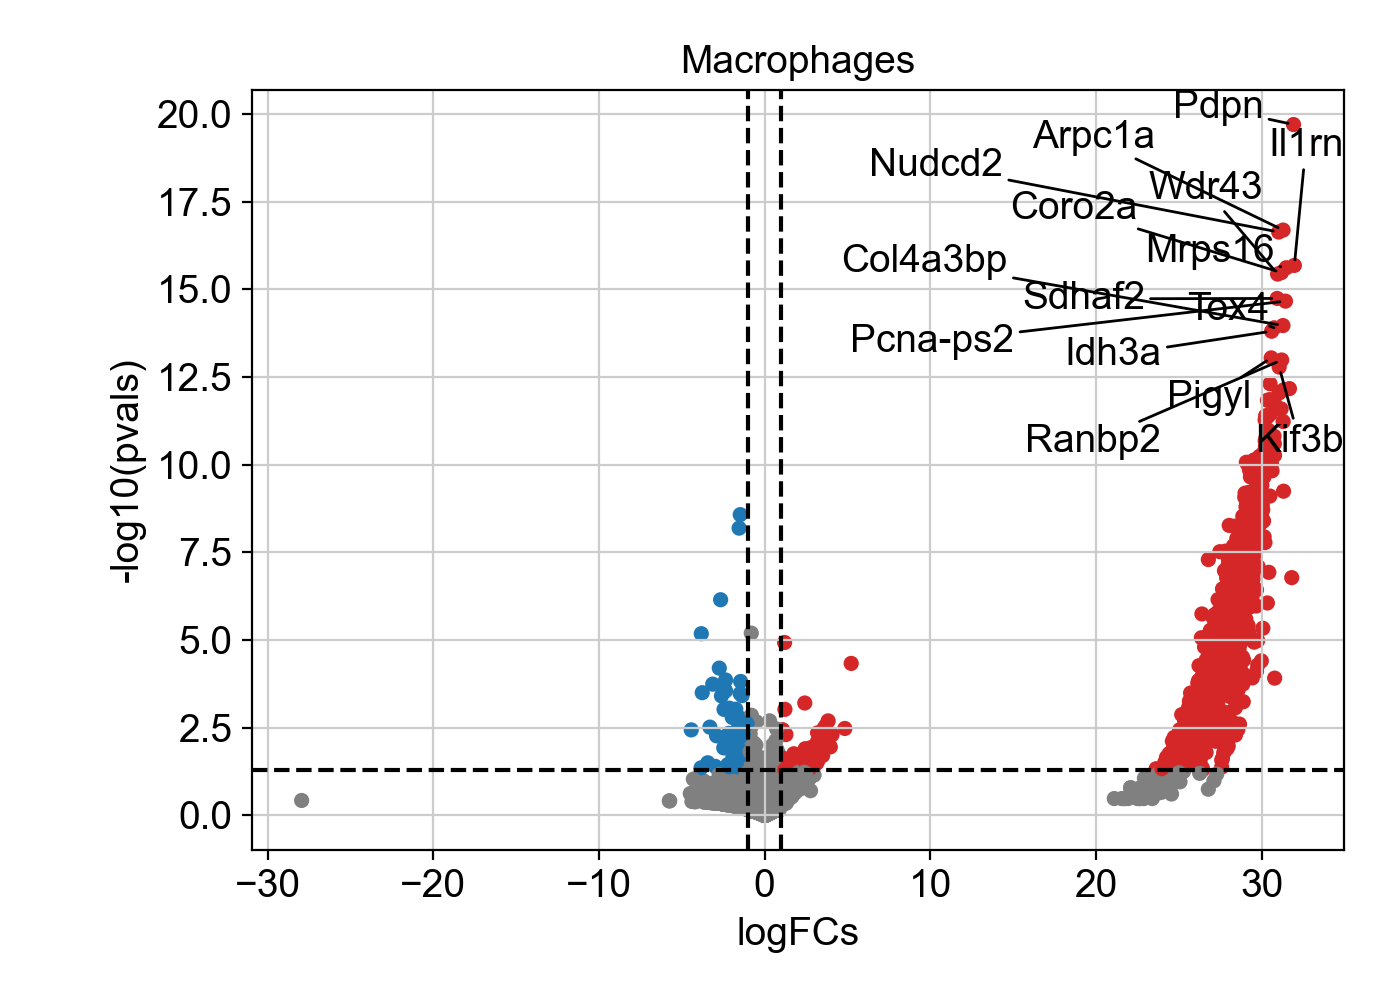

In [75]:
# Visualize those for e.g. CD14+ Monocytes
dc.plot_volcano(logFCs, pvals, "Macrophages", top=15, sign_thr=0.05, lFCs_thr=1)

In [76]:
# format results
deg = dc.format_contrast_results(logFCs, pvals)
# only keep the receiver cell type(s)
deg = deg[np.isin(deg["contrast"], receiver_celltypes)]
deg.head(15)

,contrast,name,logFCs,pvals,adj_pvals
0,AT1,Igfbp6,-3.144108,7.193551e-12,0.0
1,AT1,Emc8,30.526377,3.357577e-11,0.0
2,AT1,Aqp1,-3.251926,7.695071e-11,0.0
3,AT1,Igfbp5,-2.427581,3.002020e-09,0.000003
4,AT1,Tnc,5.607329,3.463547e-09,0.000003
5,AT1,Prc1,31.405436,3.486247e-09,0.000003
6,AT1,Cldn4,31.262344,4.514936e-09,0.000003
7,AT1,Efemp1,-2.554359,6.608376e-09,0.000004
8,AT1,Nans,30.611944,2.189816e-08,0.000011
9,AT1,Upk3b,-2.644433,2.375305e-08,0.000011


In [77]:
# define background of sufficiently expressed genes
background_genes = deg["name"].values

# only keep significant and positive DE genes
deg = deg[(deg["pvals"] <= 0.05) & (deg["logFCs"] > 1)]
# get geneset of interest
geneset_oi = deg["name"].values

In [78]:
%%R -i geneset_oi -i background_genes -o ligand_activities

ligand_activities <- predict_ligand_activities(geneset = geneset_oi, 
                                               background_expressed_genes = background_genes,
                                               ligand_target_matrix = ligand_target_matrix,
                                               potential_ligands = potential_ligands)

ligand_activities <- ligand_activities %>% 
  arrange(-aupr) %>% 
  mutate(rank = rank(desc(aupr)))

# show top10 ligand activities
head(ligand_activities, n=10)

# A tibble: 10 × 6
   test_ligand auroc  aupr aupr_corrected pearson  rank
   <chr>       <dbl> <dbl>          <dbl>   <dbl> <dbl>
 1 S100a4      0.546 0.161         0.0428  0.0802     1
 2 Areg        0.532 0.159         0.0411  0.0760     2
 3 Hc          0.542 0.157         0.0391  0.0503     3
 4 Ifitm6      0.548 0.156         0.0378  0.0763     4
 5 Hp          0.538 0.155         0.0373  0.0665     5
 6 Il1b        0.539 0.155         0.0371  0.0901     6
 7 S100a8      0.535 0.155         0.0364  0.0661     7
 8 Podxl       0.522 0.153         0.0348  0.0499     8
 9 Sirpb1c     0.522 0.152         0.0334  0.0531     9
10 C1qb        0.524 0.152         0.0334  0.0526    10


In [79]:
%%R -o vis_ligand_target
top_ligands <- ligand_activities %>%
  top_n(15, aupr) %>% 
  arrange(-aupr) %>%
  pull(test_ligand) %>%
  unique()

# get regulatory potentials
ligand_target_potential <- map(top_ligands,
                               ~get_weighted_ligand_target_links(.x,
                                                                 geneset = geneset_oi,
                                                                 ligand_target_matrix = ligand_target_matrix,
                                                                 n = 500)
                              ) %>%
    bind_rows() %>% 
    drop_na()
    
# prep for visualization
active_ligand_target_links <- 
  prepare_ligand_target_visualization(ligand_target_df = ligand_target_potential, 
                                      ligand_target_matrix = ligand_target_matrix)

# order ligands & targets
order_ligands <- intersect(top_ligands,
                           colnames(active_ligand_target_links)) %>% rev() %>% make.names()
order_targets <- ligand_target_potential$target %>%
  unique() %>% 
  intersect(rownames(active_ligand_target_links)) %>%
  make.names()
rownames(active_ligand_target_links) <- rownames(active_ligand_target_links) %>%
  make.names() # make.names() for heatmap visualization of genes like H2-T23
colnames(active_ligand_target_links) <- colnames(active_ligand_target_links) %>%
  make.names() # make.names() for heatmap visualization of genes like H2-T23

vis_ligand_target <- active_ligand_target_links[order_targets, order_ligands] %>%
  t()
    
# convert to dataframe, and then it's returned to py
vis_ligand_target <- vis_ligand_target %>%
    as.data.frame() %>%
    rownames_to_column("ligand") %>%
    as_tibble()

In [80]:
# convert dot to underscore and set ligand as index
vis_ligand_target["ligand"] = vis_ligand_target["ligand"].replace("\.", "_", regex=True)
vis_ligand_target.set_index("ligand", inplace=True)
# keep only columns where at least one gene has a regulatory potential >= 0.05
vis_ligand_target = vis_ligand_target.loc[
    :, vis_ligand_target[vis_ligand_target >= 0.05].any()
]
vis_ligand_target.head()

,Abcb1a,Ackr3,Anxa1,Anxa3,Asf1b,Atf3,Bax,Bcl2l1,Bhlhe40,Birc5,...,Igfbp6,Myrf,Nme5,Ogn,Plce1,Prex2,St6galnac2,Tead1,Tmem100,Ttc9
ligand,,,,,,,,,,,,,,,,,,,,,
Pf4,0.006056,0.0,0.000000,0.000000,0.0,0.007315,0.006976,0.008488,0.007162,0.006435,...,0.064949,0.065667,0.067331,0.067847,0.065742,0.067597,0.065809,0.064359,0.065581,0.065595
Tgfbi,0.007319,0.0,0.000000,0.006049,0.0,0.010232,0.008759,0.010608,0.009761,0.009084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sell,0.000000,0.0,0.000000,0.000000,0.0,0.009343,0.007221,0.009340,0.007967,0.007024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Esam,0.008085,0.0,0.007092,0.007383,0.0,0.008525,0.009895,0.009957,0.007030,0.007398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Col6a2,0.000000,0.0,0.000000,0.000000,0.0,0.007831,0.006920,0.008874,0.007032,0.007307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


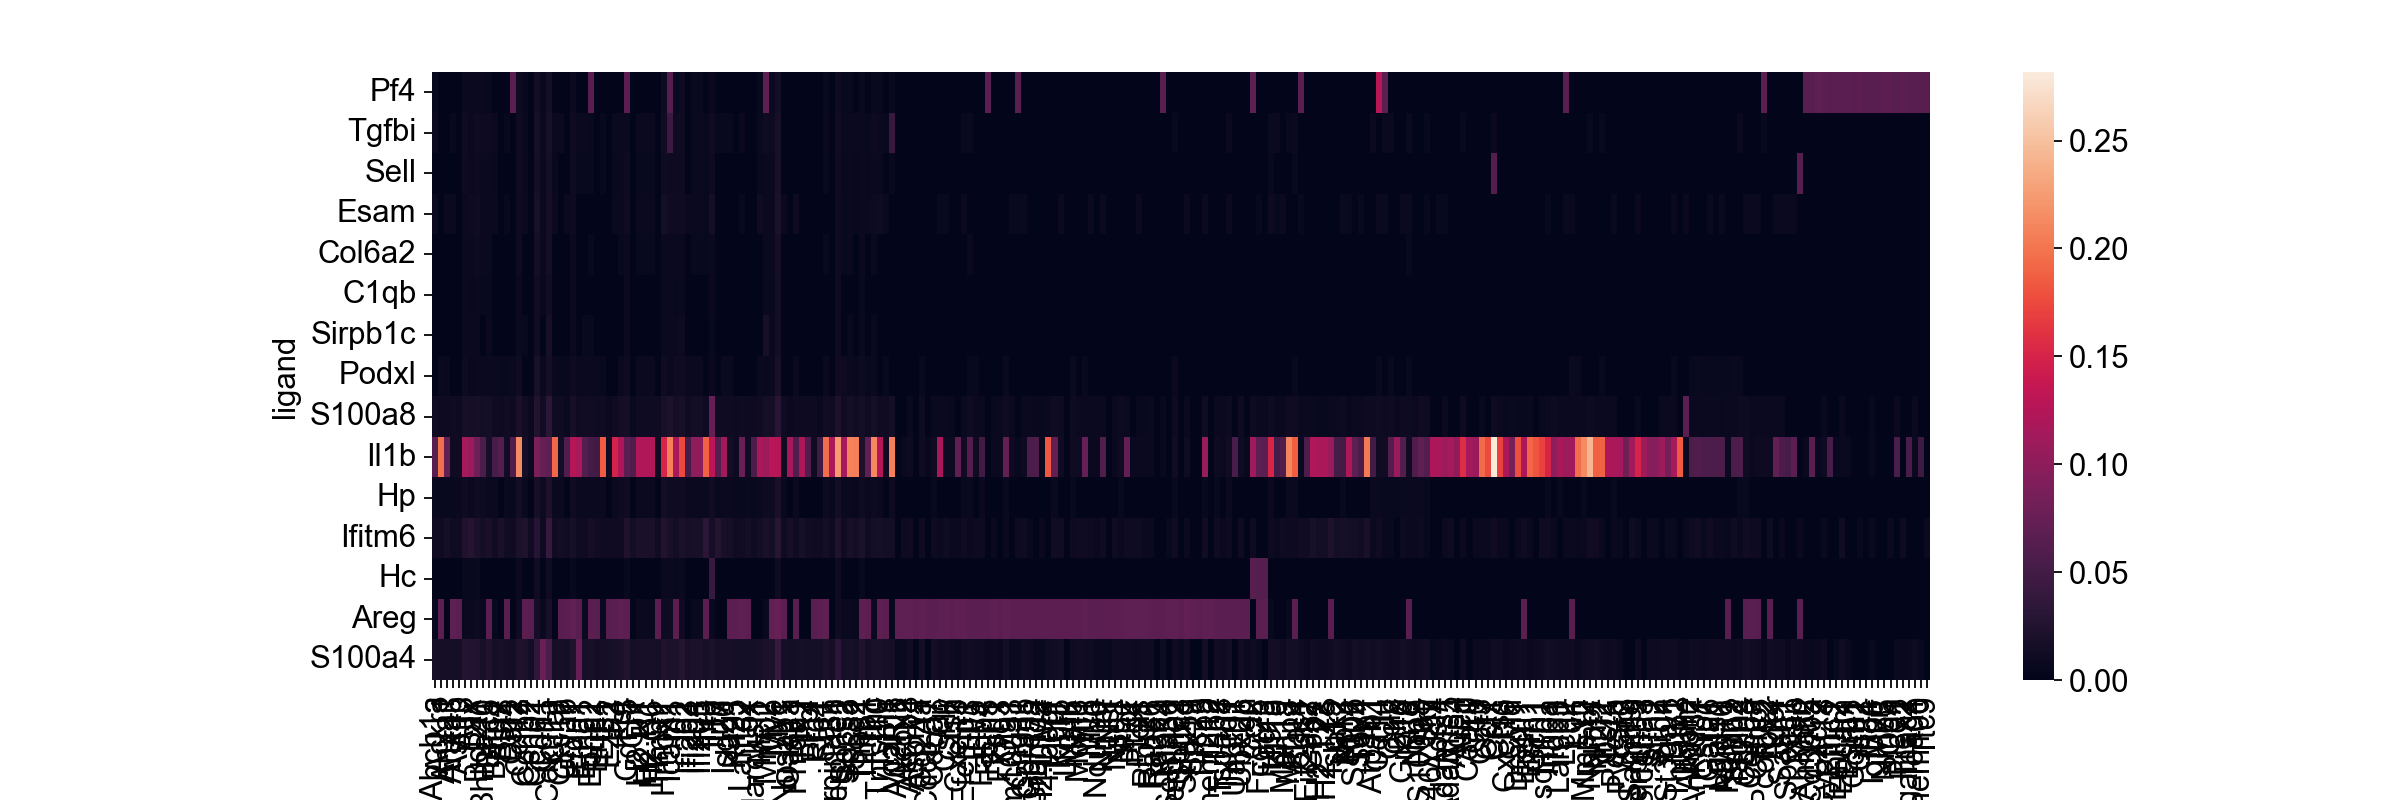

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.heatmap(vis_ligand_target, xticklabels=True, ax=ax)
plt.show()

In [82]:
ligand_oi = ligand_activities.head(5)["test_ligand"].values
ligand_oi

array(['S100a4', 'Areg', 'Hc', 'Ifitm6', 'Hp'], dtype=object)

plots

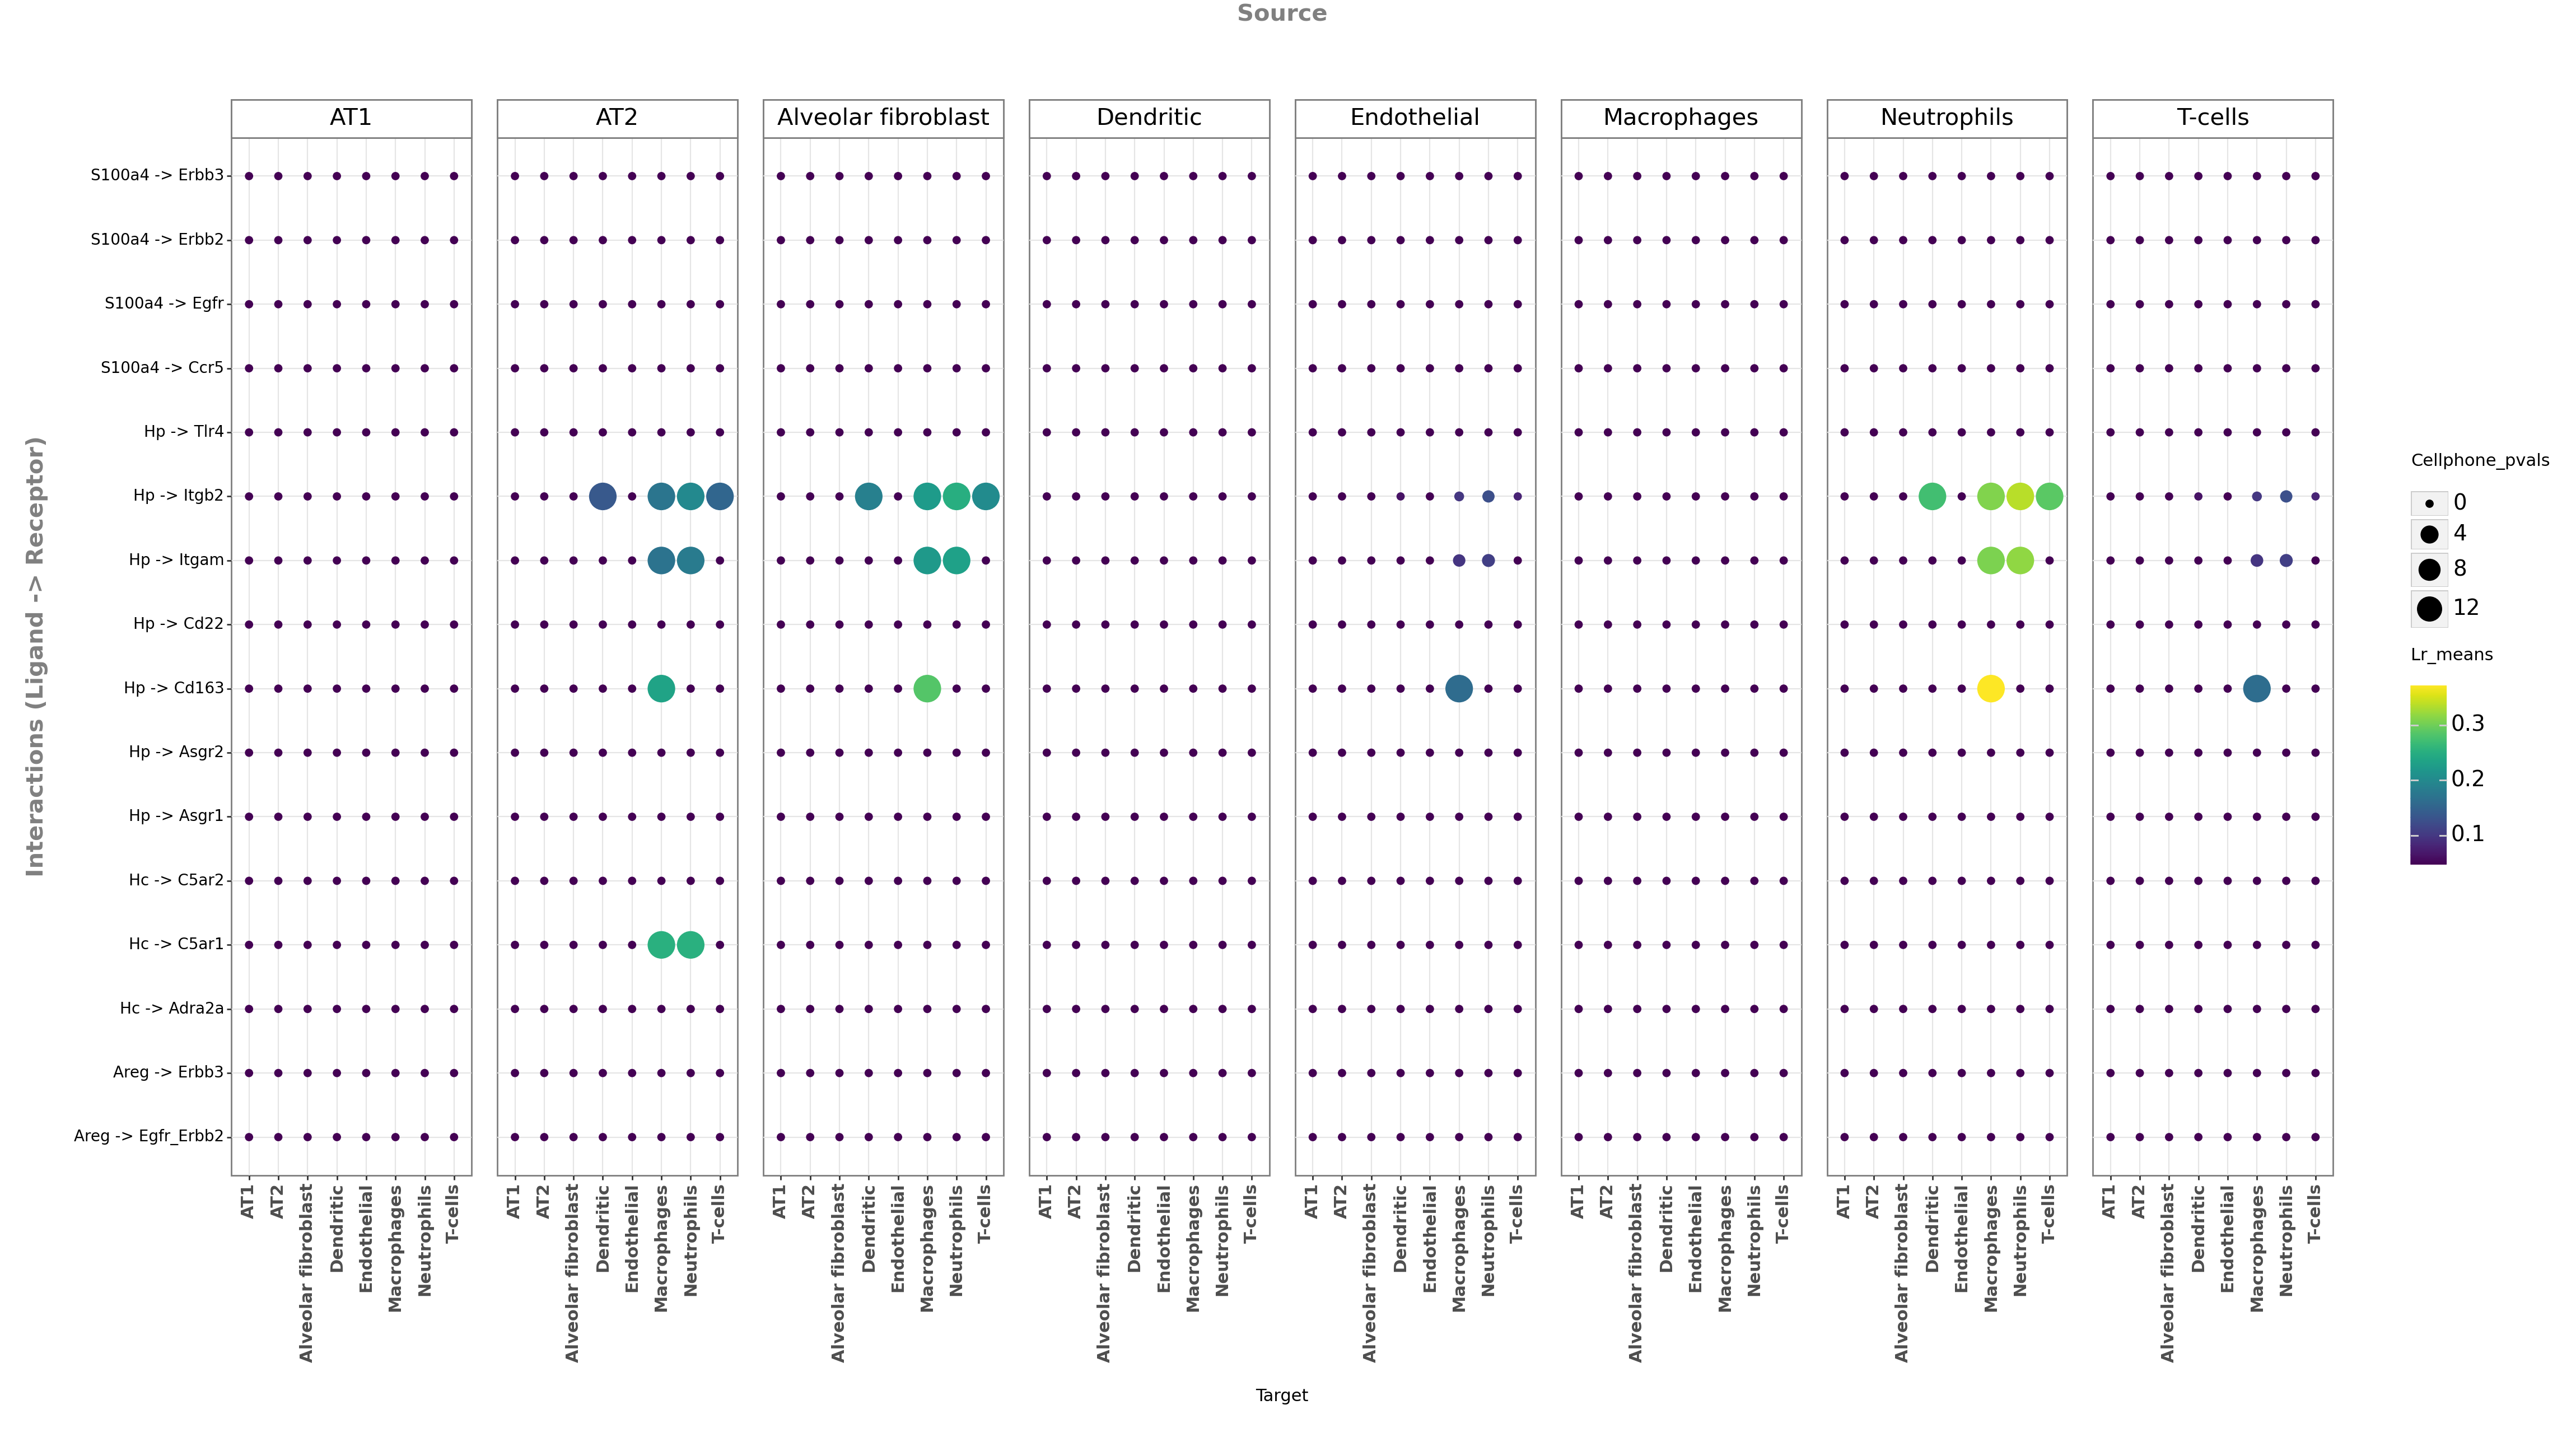

<Figure Size: (2300 x 1300)>

In [83]:
li.pl.dotplot(
    adata=adata_pbs,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=sender_celltypes,
    target_labels=receiver_celltypes,
    # keep only those ligands
    filterby="ligand_complex",
    filter_lambda=lambda x: np.isin(x, ligand_oi),
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="magnitude_rank",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=25,  # and we want to keep only the top 25 interactions
    figure_size=(23, 13),
    #size_range=(1, 6),
)

In [84]:
adata_pbs.obs

,Unnamed: 0,nGene,nUMI,orig.ident,identifier,res.2,grouping,cell.type,metacelltype,spline_cluster,...,leiden_0.7,leiden,leiden_1.3,author_annotation,batch,condition,timepoint,leiden_0.5,manual_celltype_annotation,author_annotation_coarse
0,muc4169_PBS_d14:muc4169_PBS_d14:CCATCCCGCCCG,288,366,muc4169,muc4169_PBS_d14,5,PBS,T-lymphocytes,T_cells,t_cells,...,3,4,3,T-lymphocytes,muc4169,healthy,d14,4,T-cells,T_cells
1,muc4169_PBS_d14:muc4169_PBS_d14:ATCACCTATGCG,784,1429,muc4169,muc4169_PBS_d14,1,PBS,AT2 cells,alv_epithelium,alv_epithelium,...,4,2,2,AT2 cells,muc4169,healthy,d14,3,AT2,alv_epithelium
2,muc4169_PBS_d14:muc4169_PBS_d14:CGCACCGACCAC,333,437,muc4169,muc4169_PBS_d14,13,PBS,VECs,endothelial_cells,vec,...,5,7,7,VECs,muc4169,healthy,d14,6,Endothelial,endothelial_cells
3,muc4169_PBS_d14:muc4169_PBS_d14:TCCTACTGGCAC,255,421,muc4169,muc4169_PBS_d14,1,PBS,AT2 cells,alv_epithelium,alv_epithelium,...,11,14,14,AT2 cells,muc4169,healthy,d14,3,AT2,alv_epithelium
4,muc4169_PBS_d14:muc4169_PBS_d14:CCGGAAACGCGA,389,516,muc4169,muc4169_PBS_d14,5,PBS,T-lymphocytes,T_cells,t_cells,...,3,4,3,T-lymphocytes,muc4169,healthy,d14,4,T-cells,T_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29291,muc4657_PBS_d21:muc4657_PBS_d21:CGGGTCTCATCT,698,976,muc4657,muc4657_PBS_d21,11,PBS,Ciliated cells,ciliated_cells,ciliated_cells,...,9,11,11,Ciliated cells,muc4657,healthy,d21,8,Alveolar fibroblast,ciliated_cells
29292,muc4657_PBS_d21:muc4657_PBS_d21:ATCAAGACAGTG,340,670,muc4657,muc4657_PBS_d21,1,PBS,AT2 cells,alv_epithelium,alv_epithelium,...,4,17,17,AT2 cells,muc4657,healthy,d21,3,AT2,alv_epithelium
29293,muc4657_PBS_d21:muc4657_PBS_d21:GACTGCGCATGG,223,263,muc4657,muc4657_PBS_d21,11,PBS,Ciliated cells,ciliated_cells,ciliated_cells,...,9,11,11,Ciliated cells,muc4657,healthy,d21,8,Alveolar fibroblast,ciliated_cells
29294,muc4657_PBS_d21:muc4657_PBS_d21:ATGACCGAATGT,240,436,muc4657,muc4657_PBS_d21,1,PBS,AT2 cells,alv_epithelium,alv_epithelium,...,4,17,17,AT2 cells,muc4657,healthy,d21,3,AT2,alv_epithelium
